In [1]:
%load_ext autoreload
%autoreload 2

import funcoes as f
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import yfinance as yf
from pandas_datareader import data as pdr
f.now

'2022-10-31 Monday 16:36:17'

In [2]:
strat = f.acceleratingDualMomentum(interval='1MO', momentum='weighted') ## weighted / simple / og
benchmark = f.get60_40()

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  2 of 2 completed


In [3]:
bm_stats = f.stats(benchmark[['Cumulative Returns']])
bm_stats.append(len(benchmark['ret'].loc[benchmark['ret']>0]) / len(benchmark['ret'])*100)
BMStats  = pd.DataFrame(bm_stats,columns=['60/40'],
                                  index=['CAGR','STD','Sharpe','maxDD','Sortino','Positive Periods(%)'])
strat_stats = f.stats(strat[['Cumulative Returns']])
strat_stats.append(len(strat['ret'].loc[strat['ret']>0]) / len(strat['ret'])*100)

CompareStats  = pd.DataFrame(strat_stats,columns=['Dual Momentum'],
                                  index=['CAGR','STD','Sharpe','maxDD','Sortino','Positive Periods(%)'])
CompareStats.join(BMStats)

,Dual Momentum,60/40
CAGR,12.745870,4.935458
STD,0.078138,0.092925
Sharpe,1.497683,0.418845
maxDD,-12.018092,-36.012142
Sortino,2.297349,0.476945
Positive Periods(%),76.744186,63.888889


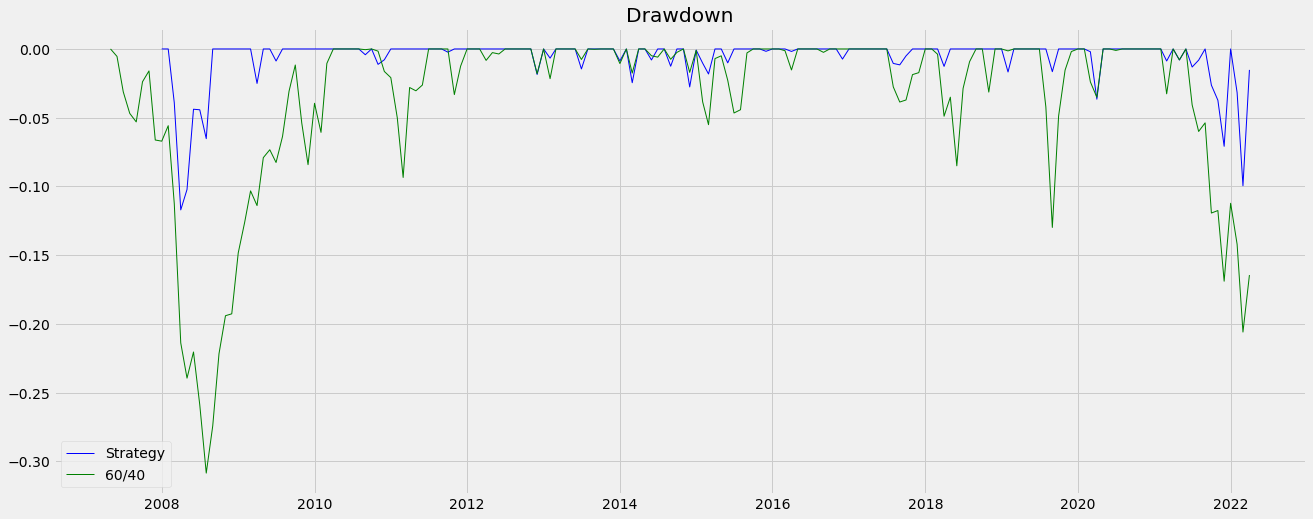

In [4]:
plt.figure(figsize=(20,8))
plt.plot(f.drawdown_DF(strat)['Date'], f.drawdown_DF(strat)['drawdowns'], linewidth=1, color='b', label='Strategy')
plt.plot(f.drawdown_DF(benchmark)['Date'], f.drawdown_DF(benchmark)['drawdowns'], linewidth=1, color='g', label='60/40')
plt.title("Drawdown")
plt.legend()
plt.show;

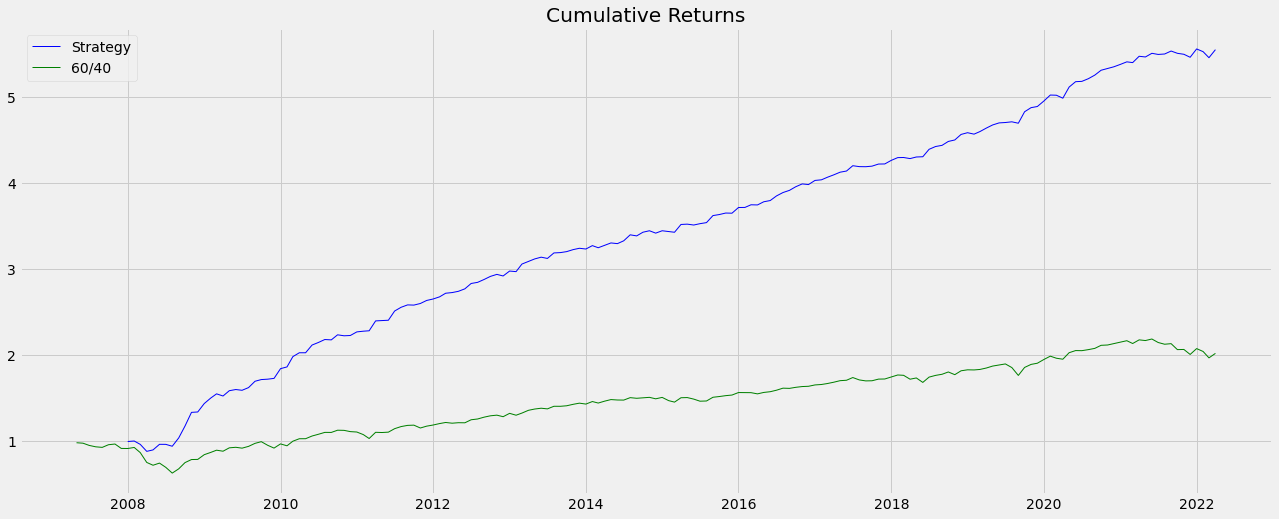

In [5]:
plt.figure(figsize=(20,8))
plt.plot(strat['date'], strat['Cumulative Returns'], linewidth=1, color='b', label='Strategy')
plt.plot(benchmark['date'], benchmark['Cumulative Returns'], linewidth=1, color='g', label='60/40')
plt.title("Cumulative Returns")
plt.legend()
plt.show;

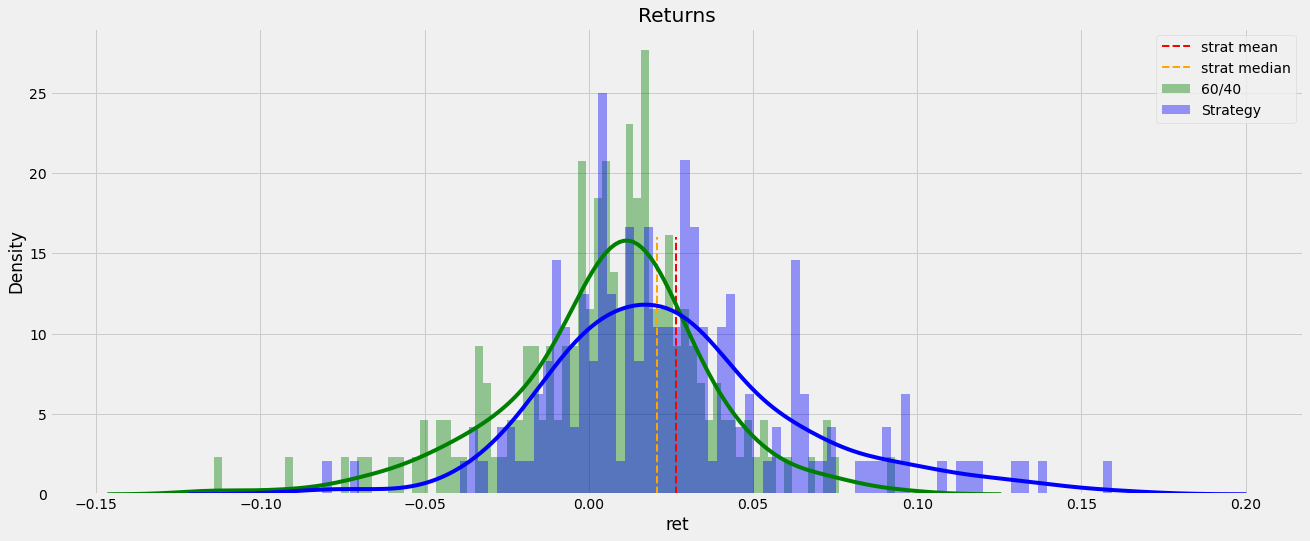

In [6]:
plt.figure(figsize=(20,8))
plt.vlines(strat['ret'].mean(), 0, 16, color='r', linestyle='dashed', linewidth=2,label='strat mean')
plt.vlines(strat['ret'].median(), 0, 16, color='orange', linestyle='dashed', linewidth=2, label='strat median')
sns.distplot(benchmark['ret'], hist=True, bins=int(len(strat['ret'])/2), color='g', label='60/40')
sns.distplot(strat['ret'], hist=True, bins=int(len(strat['ret'])/2), color='b', label='Strategy')
plt.title("Returns")
plt.legend()
plt.show;

In [7]:
# POSITIVE SKEW = MEAN HIGHER THAN MEDIAN 
print('Strategy Skewness: ', f.skewness(strat['ret']))
print('Benchmark Skewness: ', f.skewness(benchmark['ret']))

Strategy Skewness:  0.730434764043826
Benchmark Skewness:  -0.5934761569907471


In [8]:
# KURTOSIS HIGHER THAN 3 = FAT TAIL DISTRIBUTION
print('Strategy Kurtosis: ', f.kurtosis(strat['ret']))
print('Benchmark Kurtosis: ', f.kurtosis(benchmark['ret']))

Strategy Kurtosis:  4.167394055760206
Benchmark Kurtosis:  4.576310026627612


In [9]:
print('Strategy Compound Growth: ', f.compound(strat['ret']))
print('Benchmark Compound Growth: ', f.compound(benchmark['ret']))

Strategy Compound Growth:  78.61306364703044
Benchmark Compound Growth:  1.5425717207026048


In [10]:
print('Strat Annualized Volatility: ', f.annualize_vol(strat['ret'],12)*100)
print('Benchmark Annualized Volatility: ', f.annualize_vol(benchmark['ret'],12)*100)

Strat Annualized Volatility:  13.252981102464572
Benchmark Annualized Volatility:  10.59959641709725


In [11]:
print('Strat Annualized Return: ', f.annualize_rets(strat['ret'], 12)*100)
print('Benchmark Annualized Return: ', f.annualize_rets(benchmark['ret'], 12)*100)

Strat Annualized Return:  35.71467599113136
Benchmark Annualized Return:  6.418764893620277


In [12]:
rfr = f.riskFreeRate()
f.sharpe_ratio(strat['ret'], rfr, 12)
print('Strat Sharpe Ratio: ', f.sharpe_ratio(strat['ret'], rfr, 12))
print('Benchmark Sharpe Ratio: ', f.sharpe_ratio(benchmark['ret'], rfr, 12))

Strat Sharpe Ratio:  2.5915904370369707
Benchmark Sharpe Ratio:  0.5022949651983349


In [13]:
## Jarque-Bera Test
print('Are Returns Normally Distribuited? ', f.is_normal(strat['ret'], 0.01))
print('Are Returns Normally Distribuited? ', f.is_normal(benchmark['ret'], 0.01))

Are Returns Normally Distribuited?  False
Are Returns Normally Distribuited?  False


In [14]:
dd_strat = f.drawdown_DF(strat)
dd_bm = f.drawdown_DF(benchmark[-len(strat):])

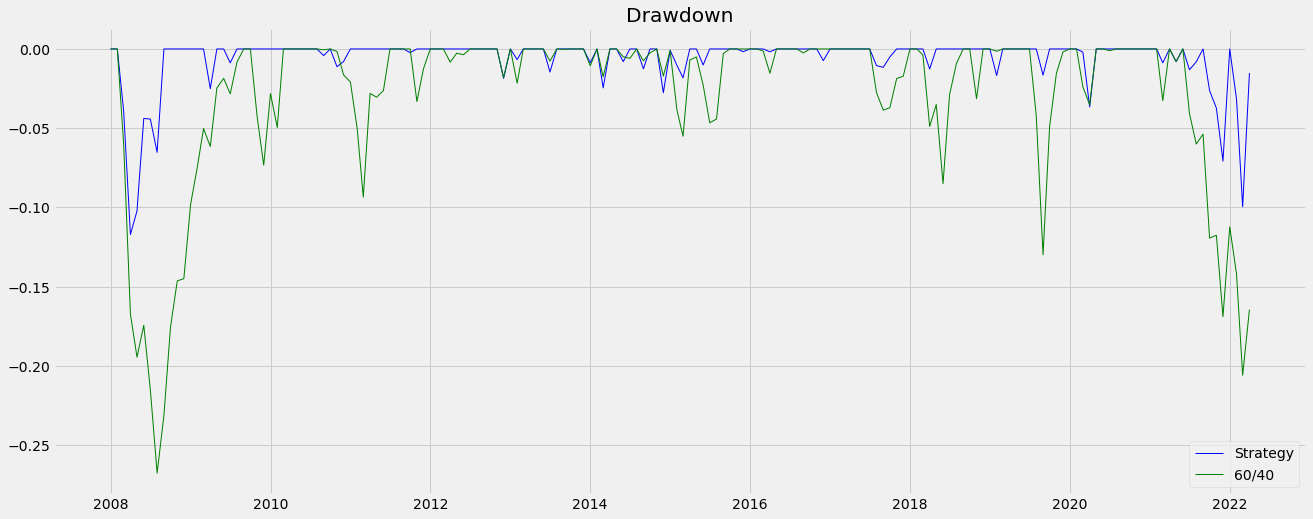

In [15]:
plt.figure(figsize=(20,8))
plt.plot(dd_strat['Date'], dd_strat['drawdowns'], linewidth=1, color='b', label='Strategy')
plt.plot(dd_bm['Date'], dd_bm['drawdowns'], linewidth=1, color='g', label='60/40')
plt.title("Drawdown")
plt.legend()
plt.show;

In [16]:
## Upwards volatility is not worrying, therefore there is Semi-Deviation to only account for below-average returns
## Semi-Deviation is the volatility of a sub-sample of below-average or below-zero returns.
print('Strategy Semi Deviation: ', f.semideviation(strat['ret'])*100)
print('Benchmark Semi Deviation: ', f.semideviation(benchmark['ret'])*100)

Strategy Semi Deviation:  1.6992053875388098
Benchmark Semi Deviation:  2.376580589124398


In [17]:
# Returns the historic Value at Risk at a specified level
# i.e. returns the number such that "level" percent of the returns
# fall below that number, and the (100-level) percent are above
print('Strategy Historic VaR: ', f.var_historic(strat['ret'], level=5)*100)
print('Benchmark Historic VaR: ', f.var_historic(benchmark['ret'], level=5)*100)

Strategy Historic VaR:  2.479753020413699
Benchmark Historic VaR:  4.943470688849587


In [18]:
print('Strategy CVar: ',f.cvar_historic(strat['ret'], level=5)*100)
print('Benchmark CVar: ',f.cvar_historic(benchmark['ret'], level=5)*100)

Strategy CVar:  4.116264355385032
Benchmark CVar:  7.084363875536981


In [19]:
print('Strategy Guassian VaR: ', f.var_gaussian(strat['ret'], level=5)*100)
print('Benchmark Guassian VaR: ', f.var_gaussian(benchmark['ret'], level=5)*100)

Strategy Guassian VaR:  3.627270108825732
Benchmark Guassian VaR:  4.452274235618261
